# Sistema de Recomendación de Películas:

## Beatriz Cárdaba y Sara Bengoechea

### Objetivo:

El objetivo de este trabajo es al creción de un sistema de recomención de películas en base a diferentes criterios. Para ello se estudiarán e implementarán diferentes algoritmos.
La bases de datos utilizada es de Kagle, se utilñizarán datos de 45.000 películas, género, arget de edad, popularidad... y datos de las votaciones por ususario para definir algoritmos basados en las peliculas y en los ususarios que las visualizan.

Índice:

1. Introducción a los sistemas de recomendación.
2. Análisis exploratorio del dataset y data engineering.
3. Demographic Filtering
4. Content Based Filtering
5. Collaborative filtering
6. Conclusiones


# Librerías:

In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from wordcloud import WordCloud, STOPWORDS
import ast
import plotly
import plotly.offline as py

## Introducción a los sistemas de recomendación.

Un sistema de recomendación, es un tipo de sistema de filtrado de información que trata de predecir la "calificación" o "preferencia" que un usuario daría a un artículo, y se utiliza principalmente en aplicaciones comerciales.

Los sistemas de recomendación se utilizan en diversos ámbitos y se reconocen más comúnmente como generadores de listas de reproducción para servicios de vídeo,música, recomendadores de productos para tiendas en línea o recomendadores de contenido para plataformas de medios sociales y recomendadores de contenido web abierto. Estos sistemas pueden funcionar utilizando una sola entrada, como la música, o múltiples entradas dentro y a través de plataformas como las noticias, los libros y las consultas de búsqueda. También hay sistemas de recomendación populares para temas específicos como restaurantes y citas online. También se han desarrollado sistemas de recomendación para explorar artículos de investigación y expertos, colaboradores, aseoseres y servicios financieros. 


Un sistema de recomendación genera una lista compilada de artículos en los que un usuario podría estar interesado, en la reciprocidad de su selección actual de artículos. Amplía las sugerencias de los usuarios sin ninguna perturbación ni monotonía, y no recomienda artículos que el usuario ya conoce.

*Complicaciones*

Los sistemas de recomendación son sistemas basados en machine learning que exploran todas las opciones posibles y proporcionan una predicción o recomendación. Sin embargo, la construcción de un sistema de recomendación tiene las siguientes complicaciones:

- Los datos de los usuarios son intercambiables.
- El volumen de datos es grande e incluye una lista significativa de películas, espectáculos, perfiles e intereses de los clientes, calificaciones y otros puntos de datos.
- Los nuevos clientes registrados suelen tener información muy limitada.
- Predicción en tiempo real para los usuarios.
- Los antiguos usuarios pueden tener una sobreabundancia de información.
- No debe mostrar elementos muy diferentes o demasiado similares.
- Los usuarios pueden cambiar la calificación de los artículos al cambiar de opinión.

Según el tipo de filtrado y klos datos utilizados encontramos diferentes tipos de sistemas de recomendación:

Hay básicamente tres tipos de sistemas de recomendación:-

- Filtro Demográfico - Ofrecen recomendaciones generalizadas a cada usuario, basadas en la popularidad de la película y/o el género. El sistema recomienda las mismas películas a usuarios con características demográficas similares. Como cada usuario es diferente, este enfoque se considera demasiado simple. La idea básica de este sistema es que las películas que son más populares y aclamadas por la crítica tendrán una mayor probabilidad de ser apreciadas por el público medio.
- Filtro basado en el contenido - Sugieren artículos similares basados en un artículo en particular. Este sistema utiliza metadatos de elementos, como el género, el director, la descripción, los actores, etc. de las películas, para hacer estas recomendaciones. La idea general de estos sistemas de recomendación es que si a una persona le gustó un elemento en particular, también le gustará un elemento similar.
- Filtro de colaboración- Este sistema empareja a las personas con intereses similares y proporciona recomendaciones basadas en este emparejamiento. Los filtros de colaboración no requieren metadatos de los artículos como sus homólogos basados en el contenido.

En este proyecto desarrollaremos diferentes alfogritmos basasdos en estos tiops tipos de filtros además de utilizar sistemas combiando algunos tipos de filtros.

A continuación, se va a realizar un EDA de los datos que se van a utilizar en este sistemas de recomendación.

## EDA

Se va arealizar un análisi exploratorio de la base de datos 'Movies' que hemos obtenido en Kaggle, que consta con 45.000 peñiculas extraídas de TMBD (The Movie Data Base)


### Importamos los datos:
En primer lugar importamos los datos en formato csv:

In [2]:
movies = pd.read_csv("../data/01_raw/movies_metadata.csv")
movies.head()

/opt/anaconda3/envs/rec_sys_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning:

Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.



adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
2                                   NaN  15602  tt0113228                en   
3                                   NaN  31357  tt0114885                en   
4                                   NaN  11862  tt0113041                en   

                original_title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                            overview  ... release_date  \
0  Led by Woody, Andy's toys live happily in his ...  ...   1995-10-30   
1  When siblings Judy and Peter discover an encha...  ...   1995-12-15   
2  A family wedding reignites the ancient feud be...  ...   1995-12-22   
3  Cheated on, mistreated and stepped on, the wom...  ...   1995-12-22   
4  Just when George Banks has recovered from his ...  ...   1995-02-10   

       revenue runtime                                   spoken_languages  \
0  373554033.0    81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1  262797249.0   104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
2          0.0   101.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3   81452156.0   127.0           [{'iso_639_1': 'en', 'name': 'English'}]   
4   76578911.0   106.0           [{'iso_639_1': 'en', 'name': 'English'}]   

     status                                            tagline  \
0  Released                                                NaN   
1  Released          Roll the dice and unleash the excitement!   
2  Released  Still Yelling. Still Fighting. Still Ready for...   
3  Released  Friends are the people who let you be yourself...   
4  Released  Just When His World Is Back To Normal... He's ...   

                         title  video vote_average vote_count  
0                    Toy Story  False          7.7     5415.0  
1                      Jumanji  False          6.9     2413.0  
2             Grumpier Old Men  False          6.5       92.0  
3            Waiting to Exhale  False          6.1       34.0  
4  Father of the Bride Part II  False          5.7      173.0  

[5 rows x 24 columns]

In [3]:
movies.columns # visualizamos las columnas del data set

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

## Diccionario de Variables:
 - adult: Indica si la película es de clasificación X o de adultos.
 - belongs_to_collection: Un diccionario de frases que da información sobre la serie de películas a la que pertenece la película en particular.
 - budget: El presupuesto de la película en dólares.
 - genres: Una lista de diccionarios que enumera todos los géneros asociados con la película.
 - homepage: La página oficial de la película.
 - id: El ID de la mudanza.
 - imdb_id: El ID de IMDB de la película.
 - original_language: El idioma en el que la película fue filmada originalmente.
 - original_title: El título original de la película.
 - overview: Un breve resumen de la película.
 - popularity: La puntuación de popularidad asignada por el TMDB.
 - poster_path: La URL de la imagen del cartel.
 - production_companies: Una lista de compañías de producción involucradas en la realización de la película.
 - production_countries: Una lista de países donde la película fue filmada/producida.
 - release_date: La fecha de estreno en el teatro de la película.
 - revenue: Los ingresos totales de la película en dólares.
 - runtime: El tiempo de ejecución de la película en minutos.
 - spoken_languages: Una lista de los idiomas hablados en la película.
 - status: El estado de la película (Liberada, Por liberar, Anunciada, etc.)
 - tagline: El eslogan de la película.
 - title: El título oficial de la película.
 - video: Indica si hay un video presente de la película con TMDB.
 - vote_average: La calificación promedio de la película.
 - vote_count: El número de votos de los usuarios, según el recuento de TMDB.

In [4]:
movies.info() # tipo de variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

### Palabras más usadas en los títulos de las películas

In [5]:
movies['title'] = movies['title'].astype('str') # tipo a string

In [6]:
title_words = ' '.join(movies['title'])

 El siguiente esquema muestra que las palabras más usadas en los títulos de las películas son:
- Love
- Man
- Day
- Girl

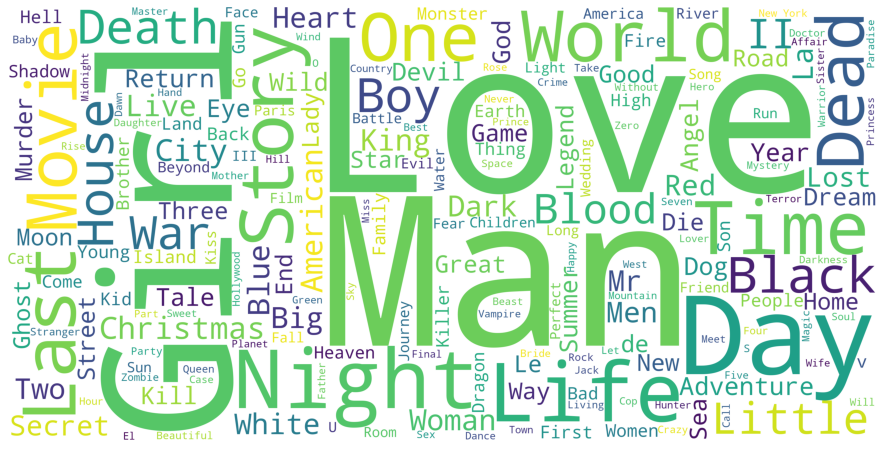

In [7]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_words)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

### Palabras más usadas en las descripciones de las películas

In [8]:
movies['overview'] = movies['overview'].astype('str')# tipo a string

In [9]:
overview_words = ' '.join(movies['overview'])

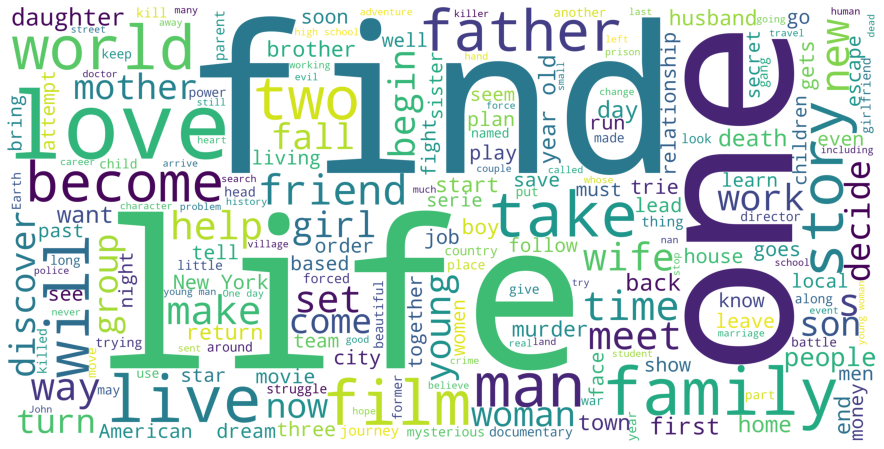

In [10]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_words)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

 El siguiente esquema muestra que las palabras más usadas en los títulos de las películas son:
- find
- one
- life
- love

## Mapa de los países que más peliculas producen:


In [11]:
movies['production_countries'] = movies['production_countries'].fillna('[]').apply(ast.literal_eval)
movies['production_countries'] = movies['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [12]:
s = movies.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'countries'

<ipython-input-12-68b3e14b9b9e>:1: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [13]:
con_df = movies.drop('production_countries', axis=1).join(s)
con_df = pd.DataFrame(con_df['countries'].value_counts())
con_df['country'] = con_df.index
con_df.columns = ['num_movies', 'country']
con_df = con_df.reset_index().drop('index', axis=1)

In [17]:
        
data = [ dict(    
        type = 'choropleth',
        locations = con_df['country'],
        locationmode = 'country names',
        z = con_df['num_movies'],
        text = con_df['country'],
        colorscale = [[0,'rgb(255, 255, 255)'],[1,'rgb(255, 0, 0)']],
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Production Countries'),
      ) ]

layout = dict(
    title = 'Production Countries for the MovieLens Movies',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

**Popularidad, promedio de votos y recuento de votos**


En esta sección, trabajaremos con las métricas que nos proporcionen los usuarios del TMDB. Intentaremos comprender mejor la popularidad, la media de votos y las características del recuento de votos e intentaremos deducir cualquier relación entre ellas, así como otras características numéricas como el presupuesto y los ingresos.

En primer lugar aplicamos una fórmula para transformar todos los datos de estas columnas a tipo numérico: 

In [18]:
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan

In [19]:
movies['popularity'] = movies['popularity'].apply(clean_numeric).astype('float')
movies['vote_count'] = movies['vote_count'].apply(clean_numeric).astype('float')
movies['vote_average'] = movies['vote_average'].apply(clean_numeric).astype('float')

### Películas por popularidad
La puntuación de popularidad es asignada por el TMDB

In [20]:
movies[['title', 'popularity']].sort_values('popularity', ascending=False).head(10) # ordenamos de mayor a menor popularidad

title  popularity
30700                         Minions  547.488298
33356                    Wonder Woman  294.337037
42222            Beauty and the Beast  287.253654
43644                     Baby Driver  228.032744
24455                      Big Hero 6  213.849907
26564                        Deadpool  187.860492
26566  Guardians of the Galaxy Vol. 2  185.330992
14551                          Avatar  185.070892
24351                       John Wick  183.870374
23675                       Gone Girl  154.801009

### Películas más votadas

In [21]:
movies[['title', 'vote_count']].sort_values('vote_count', ascending=False).head(10)

title  vote_count
15480                Inception     14075.0
12481          The Dark Knight     12269.0
14551                   Avatar     12114.0
17818             The Avengers     12000.0
26564                 Deadpool     11444.0
22879             Interstellar     11187.0
20051         Django Unchained     10297.0
23753  Guardians of the Galaxy     10014.0
2843                Fight Club      9678.0
18244         The Hunger Games      9634.0

### Películas con mayor nota media:

In [22]:
movies[movies['vote_count'] > 2000][['title', 'vote_average', 'vote_count']].sort_values('vote_average', ascending=False).head(10)

title  vote_average  vote_count
314           The Shawshank Redemption           8.5      8358.0
834                      The Godfather           8.5      6024.0
2211                 Life Is Beautiful           8.3      3643.0
5481                     Spirited Away           8.3      3968.0
1152   One Flew Over the Cuckoo's Nest           8.3      3001.0
1176                            Psycho           8.3      2405.0
2843                        Fight Club           8.3      9678.0
1178            The Godfather: Part II           8.3      3418.0
12481                  The Dark Knight           8.3     12269.0
292                       Pulp Fiction           8.3      8670.0

### Películas con mayor presupuesto

In [23]:
movies['budget'] = movies['budget'].apply(clean_numeric).astype('float')
movies['revenue'] = movies['revenue'].apply(clean_numeric).astype('float')
movies[movies['budget'].notnull()][['title', 'budget', 'revenue']].sort_values('budget', ascending=False).head(10)

title       budget       revenue
17124  Pirates of the Caribbean: On Stranger Tides  380000000.0  1.045714e+09
11827     Pirates of the Caribbean: At World's End  300000000.0  9.610000e+08
26558                      Avengers: Age of Ultron  280000000.0  1.405404e+09
11067                             Superman Returns  270000000.0  3.910812e+08
16130                                      Tangled  260000000.0  5.917949e+08
18685                                  John Carter  260000000.0  2.841391e+08
44842                Transformers: The Last Knight  260000000.0  6.049421e+08
11780                                 Spider-Man 3  258000000.0  8.908716e+08
21175                              The Lone Ranger  255000000.0  8.928991e+07
19971            The Hobbit: An Unexpected Journey  250000000.0  1.021104e+09

### Correlaciones entre variables numéricas:

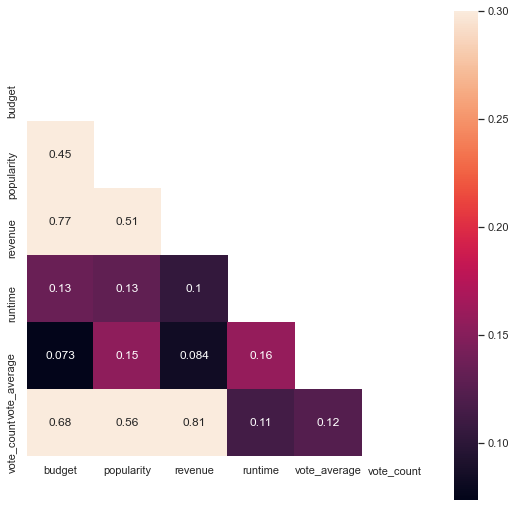

In [24]:
sns.set(font_scale=1)
corr = movies.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(9,9))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True)

### Géneros

In [25]:
movies['genres'] = movies['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [26]:
s = movies.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'

<ipython-input-26-365cc2aa1760>:1: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [27]:
genero_df = movies.drop('genres', axis=1).join(s)

In [28]:
genero_df['genre'].value_counts().shape[0]

32

In [29]:
pop_gen = pd.DataFrame(genero_df['genre'].value_counts()).reset_index()
pop_gen.columns = ['genre', 'movies']
pop_gen.head(10)

genre  movies
0            Drama   20265
1           Comedy   13182
2         Thriller    7624
3          Romance    6735
4           Action    6596
5           Horror    4673
6            Crime    4307
7      Documentary    3932
8        Adventure    3496
9  Science Fiction    3049

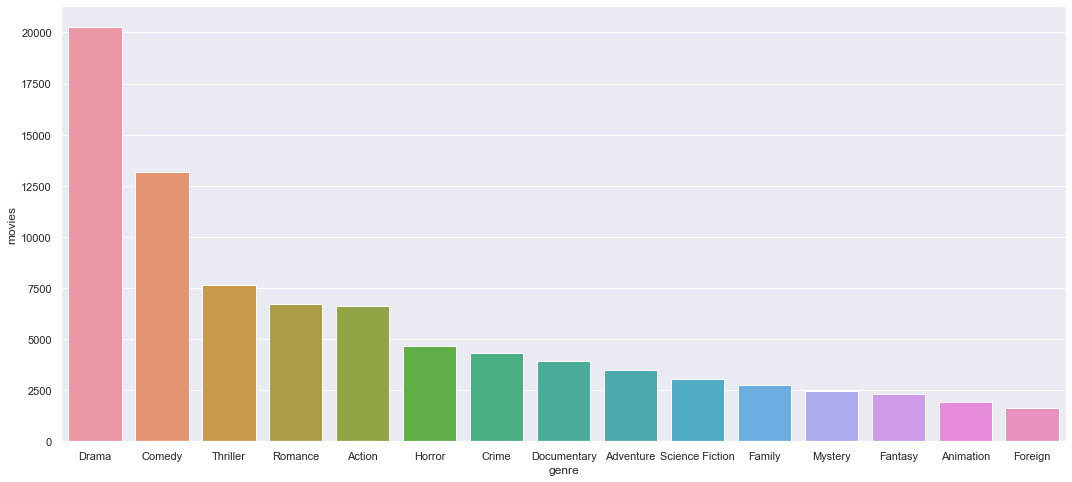

In [30]:
plt.figure(figsize=(18,8))
sns.barplot(x='genre', y='movies', data=pop_gen.head(15))
plt.show()

__Bibliografiía:__
- https://www.kaggle.com/rounakbanik/the-story-of-film/
- https://www.kaggle.com/rounakbanik/the-movies-dataset
- https://automating-gis-processes.github.io/2016/Lesson5-World-3D.html
- https://www.upf.edu/hipertextnet/numero-2/recomendacion.html
- https://repositorio.uam.es/bitstream/handle/10486/688135/pertejo_mangas_adri%C3%A1n_tfg.pdf?sequence=1&isAllowed=y
- https://seaborn.pydata.org/generated/seaborn.barplot.html



